# Explore here

In [231]:
import pandas as pd

df = pd.read_csv('/workspaces/machine-learning-python-template5/data/raw/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [233]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [234]:
import matplotlib.pyplot as plt 
import seaborn as sns


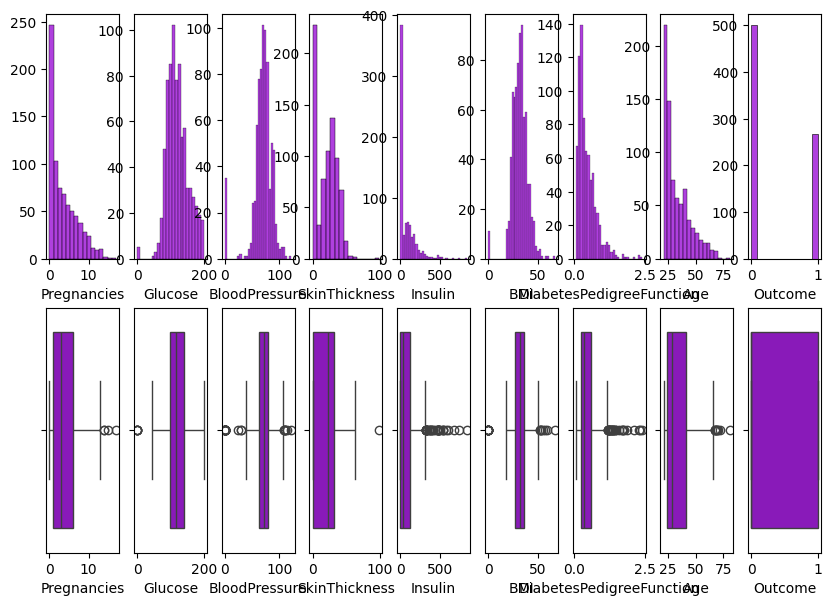

In [235]:
fig, axis = plt.subplots(2, 9, figsize = (10, 7))


x_data = []
for i in df.columns:
    x_data.append(i)

for i, col in enumerate(x_data):
    sns.histplot(ax=axis[0, i], data=df, x=col, color='darkviolet').set(ylabel=None)
    sns.boxplot(ax=axis[1, i], data=df, x=col, color='darkviolet')




plt.show()

The variables with the most outliers are insulin, DiabetesPedigreeFunction and BMI

In [236]:
df = df[df['Insulin'] > 0]
df = df[df['Glucose'] >0 ]
df = df[df['BMI'] >0 ]

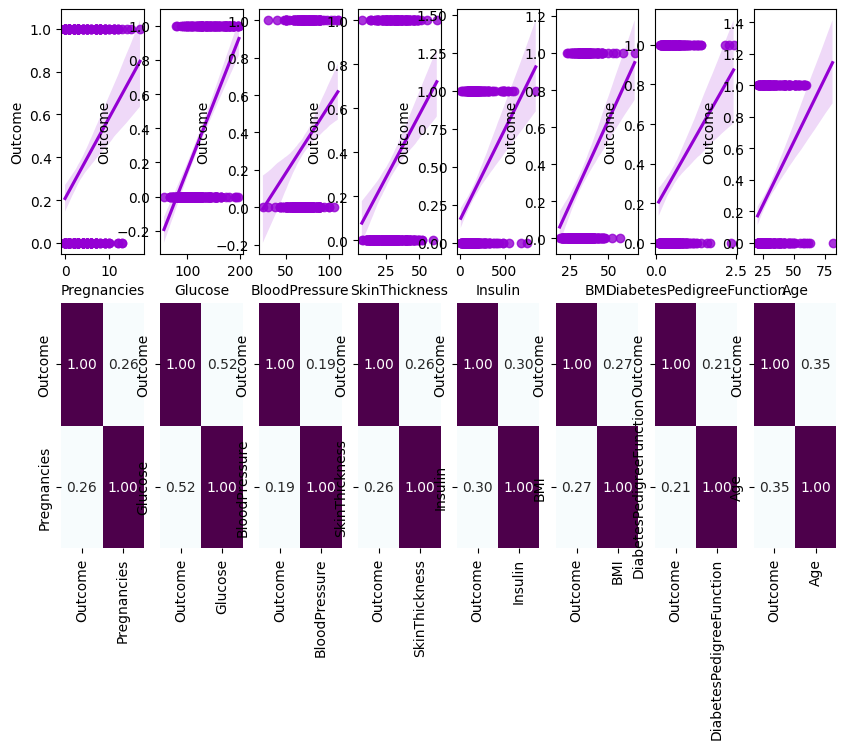

In [237]:
fig, axis = plt.subplots(2, 8, figsize = (10, 7))


df2 = df.drop('Outcome', axis=1)
x_data = []
for i in df2.columns:
    x_data.append(i)
for i, col in enumerate(x_data):
    sns.regplot(ax = axis[0, i], data = df, x = col, y = 'Outcome', color = 'darkviolet')
    sns.heatmap(df[["Outcome", col]].corr(), annot = True, fmt = ".2f", ax = axis[1, i], cbar = False, cmap="BuPu")




plt.show()

The strongest relationship is between the glucose and the diabetes. This is followed by the BMI, the age and the pregnancies. 

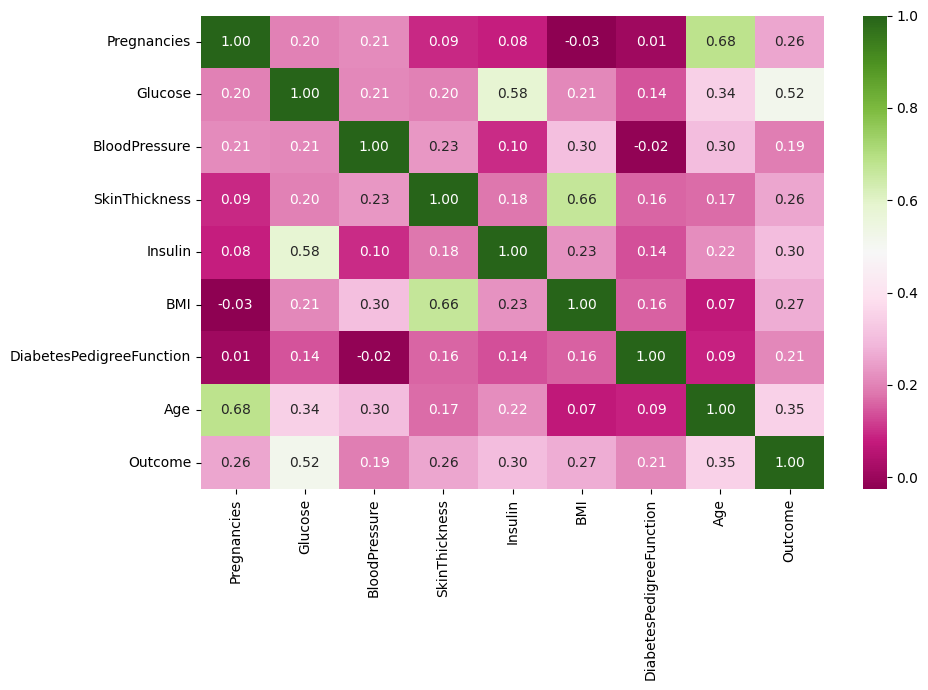

In [238]:
fig, axis = plt.subplots(figsize = (10, 7))

x_data = []
for i in df.columns:
    x_data.append(i)
sns.heatmap(df[x_data].corr(), annot = True, fmt = ".2f", cmap="PiYG")

plt.tight_layout()

plt.show()

Here we can see again, that the most related variables are glucose, BMI and age. There is also a very strong relationship between pregnancies and age, that we can study further. 

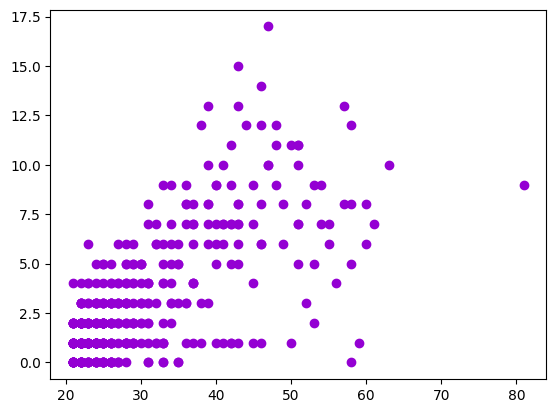

In [239]:
plt.scatter(x = df['Age'], y = df['Pregnancies'],color = 'darkviolet' )
plt.show()

In [260]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split

x_data = []
for i in df.columns:
    x_data.append(i)

X = df.drop("Outcome", axis = 1)
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.to_csv("/workspaces/machine-learning-python-template5/data/raw/diabetes_train_X.csv", index=False)
with open("/workspaces/machine-learning-python-template5/data/raw/bdiabetes_train_y.txt", "w") as f:
    f.write(y_train.to_string(index=False))
X_test.to_csv("/workspaces/machine-learning-python-template5/data/raw/diabetes_test_X.csv", index=False)
with open("/workspaces/machine-learning-python-template5/data/raw/diabetes_test_y.txt", "w") as f:
    f.write(y_test.to_string(index=False))
X_train.head()

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
506,0,180,90,26,90,36.5,0.314,35
368,3,81,86,16,66,27.5,0.306,22
345,8,126,88,36,108,38.5,0.349,49
134,2,96,68,13,49,21.1,0.647,26
659,3,80,82,31,70,34.2,1.292,27


In [261]:
# from sklearn.feature_selection import f_classif, SelectKBest

# # Con un valor de k = 5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
# selection_model = SelectKBest(f_classif, k= int(len(X_train.columns) * 0.7))
# selection_model.fit(X_train, y_train)
# ix = selection_model.get_support()
# X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
# X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

# X_train_sel.head()

This solution to the best selection process is good because it is what he had seen already.

In [262]:
X_train["Outcome"] = list(y_train)
X_test['Outcome'] = list(y_test)

<Axes: >

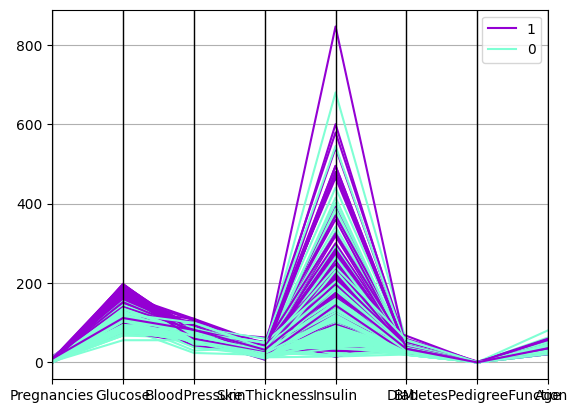

In [263]:
pd.plotting.parallel_coordinates(X_train, "Outcome", color = ("darkviolet", "aquamarine"))

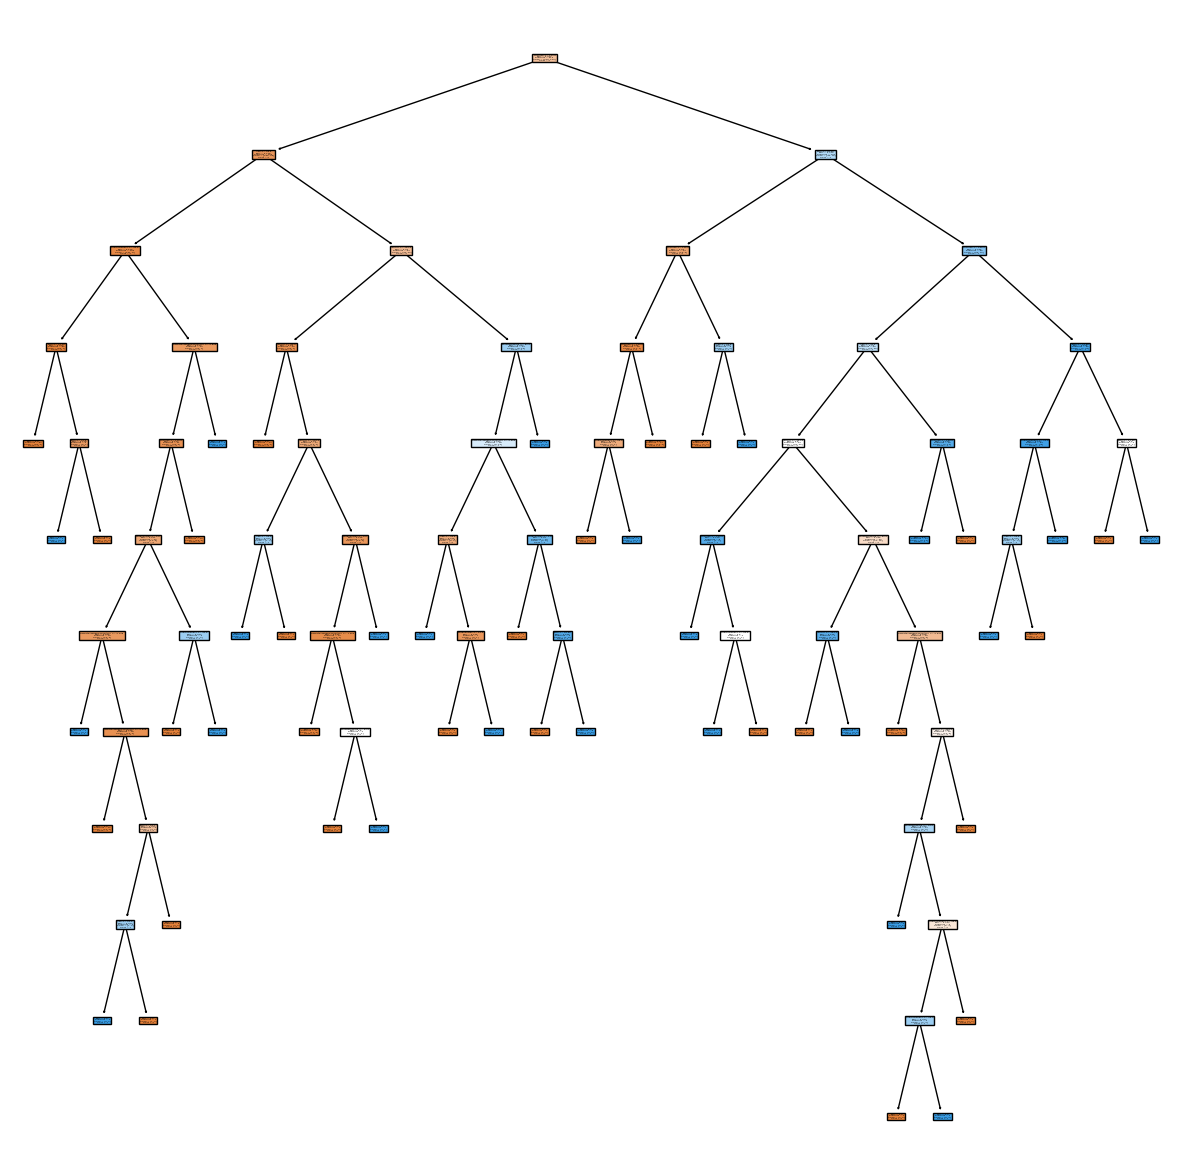

In [264]:
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier


X_train_outcome = X_train['Outcome']
X_train = X_train.drop('Outcome', axis=1)  
 
X_test_outcome = X_test['Outcome']
X_test = X_test.drop('Outcome', axis=1) 

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, X_train_outcome)


fig = plt.figure(figsize=(15, 15))
tree.plot_tree(model, feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)

plt.show()

In [266]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [267]:
from sklearn.metrics import accuracy_score

accuracy_score(X_test_outcome, y_pred)

0.7088607594936709

In [268]:
from pickle import dump

dump(model, open("decision_tree_classifier_default_50.sav", "wb"))


In [269]:
from sklearn.model_selection import GridSearchCV

# We define the parameters by hand that we want to adjust
hyperparams = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [270]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, X_train_outcome)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [271]:
model_grid = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2, min_samples_split = 2, random_state=33)
model_grid.fit(X_train, X_train_outcome)
y_pred1 = model_grid.predict(X_test)
grid_accuracy = accuracy_score(X_test_outcome, y_pred1)
grid_accuracy

0.7468354430379747

In [272]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state = 42)
model2.fit(X_train, X_train_outcome)

RandomForestClassifier(random_state=42)

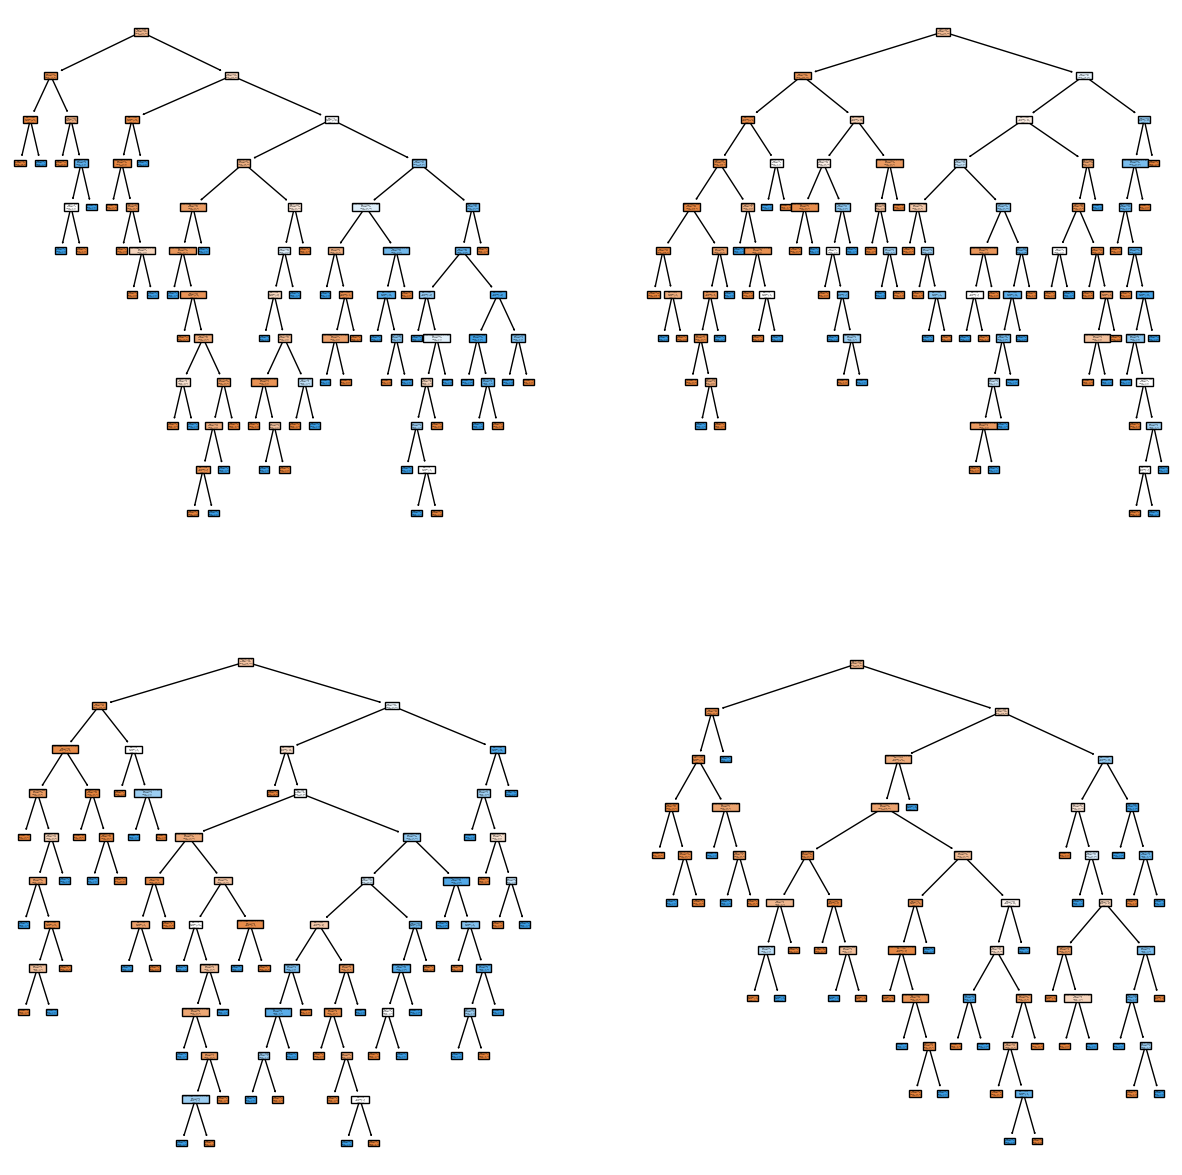

In [273]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model2.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model2.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model2.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model2.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
plt.show()

In [274]:
y_pred2 = model2.predict(X_test)
y_pred2

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [275]:
from sklearn.metrics import accuracy_score

accuracy_score(X_test_outcome, y_pred2)

0.7848101265822784

In [282]:
hyperparams2 = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4] 
}
grid2 = GridSearchCV(model2, hyperparams2, scoring = "accuracy", cv = 5)
grid2

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [283]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid2.fit(X_train, X_train_outcome)

print(f"Best hyperparameters: {grid2.best_params_}")

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [287]:
model_grid2 = RandomForestClassifier(max_depth = None, min_samples_leaf = 4, min_samples_split = 10, n_estimators=50, random_state=42)
model_grid2.fit(X_train, X_train_outcome)
y_pred3 = model_grid2.predict(X_test)
grid_accuracy2 = accuracy_score(X_test_outcome, y_pred3)
grid_accuracy2

0.7468354430379747